# Toy Examples

In this notebook we visualize and approximate 1-D and 2-D (nonlinear pendulum) functions.

In [1]:
import gaussian_process as GP
import numpy as np
import matplotlib.pyplot as plt
import swimnetworks

## 1-D Example
### Here is the first function that we want to approximate 

$$
  f(x) = \frac{x^{3}}{3} - \frac{x^{2}}{2} - \frac{1}{2} \cos{(x^{2})}
$$

$$
  \frac{\partial f(x)}{\partial x} = x^{2} - x^{2} + \sin{(x^{2})}x
$$

Where $x \in \mathbb{R}$ and $f(x) \in \mathbb{R}$ 

Drawing function using (100,) points.




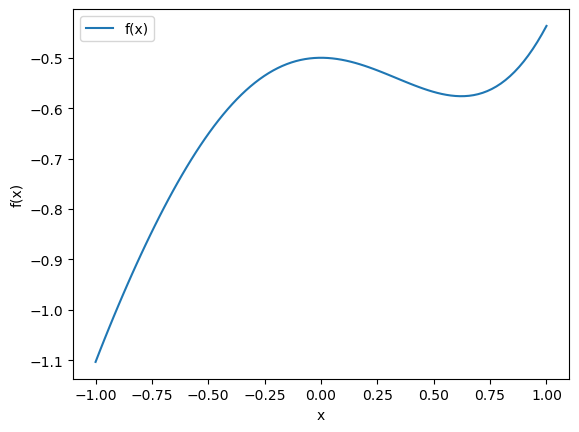

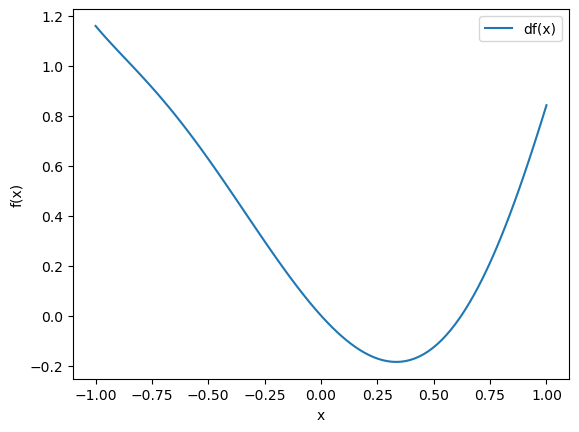

In [2]:
# one dimensional function that we want to approximate as a toy example
def f(x):
    return x**3/3-x**2/2-1/2*np.cos(x**2)
def df(x):
    return x**2-x+np.sin(x**2)*x

# number of points to sample 
N = 100
x = np.linspace(-1, 1, N)
y = f(x)
dx = df(x)

print('Drawing function using', x.shape, 'points.')
fig = plt.figure()
plt.plot(x,y,label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
print()

fig = plt.figure()
plt.plot(x,dx,label='df(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
print()

In [3]:
# attention, later we will use more dimensional inputs, so it is useful 
# to have the input defined as [ [x_1], [x_2], ... ]] instead of [ x_1, x_2, ... ]
# an example is the following

# example reshaping
N = 2 # sample only 2 points
input_set = np.linspace(-1,1,N)
print('input_set shape is: ', input_set.shape) # ( 2 )
print('input_set is:', input_set)
print('the following formulation also contains one-dimensional input values but wrapped:')
wrapped_input_set = np.linspace(-1,1,N).reshape(N,1)
print('wrapped_input_set shape is:', wrapped_input_set.shape) # (2, 1)
print('wrapped_input_set is:', wrapped_input_set)

print('-------------------------------')
print('solution to [ -1, 1 ] entries is: ' + str(f(input_set)))
print('solution to [ [-1], [1] ] entries is: ' + str(f(wrapped_input_set)))

input_set shape is:  (2,)
input_set is: [-1.  1.]
the following formulation also contains one-dimensional input values but wrapped:
wrapped_input_set shape is: (2, 1)
wrapped_input_set is: [[-1.]
 [ 1.]]
-------------------------------
solution to [ -1, 1 ] entries is: [-1.10348449 -0.43681782]
solution to [ [-1], [1] ] entries is: [[-1.10348449]
 [-0.43681782]]


## Here is the second function that want to approximate

The following function is a Hamiltonian. Therefore let's define our general Hamiltonian system!

A Hamiltonian system is determined through a function called ***Hamiltonian***. 

$$H: E \rightarrow \mathbb{R} $$  

The Hamiltonian incorporates the following set of equations that dictates how a dynamical system changes and evolves over time.  

$$
  \frac{\partial q(t)}{\partial t} = \frac{\partial H(q(t),p(t))}{\partial p} 
$$

$$
  \frac{\partial p(t)}{\partial t} = -\frac{\partial H(q(t),p(t))}{\partial q} 
$$

Where $(q,p) \in \mathbb{R}^{2n}$, and $n$ is the number of degrees of freedom of the system. The equations above can be restated as the following to construct a PDE for $H$ at every $(q,p) \in E $,

$$\begin{bmatrix} 0 & I \\ -I & 0 \end{bmatrix} \cdot \nabla H(q,p) - v(q,p) $$
$$ = \begin{bmatrix} 0 & I \\ -I & 0 \end{bmatrix} \cdot \begin{bmatrix} \frac{\partial H(q,p)}{\partial q} \\ \frac{\partial H(q,p)}{\partial p} \end{bmatrix} - \begin{bmatrix} \frac{\partial q}{\partial t} \\ \frac{\partial p}{\partial t} \end{bmatrix} $$
$$ = \begin{bmatrix} \frac{\partial H(q,p)}{\partial p} \\ -\frac{\partial H(q,p)}{\partial q} \end{bmatrix} - \begin{bmatrix} \frac{\partial q}{\partial t} \\ \frac{\partial p}{\partial t} \end{bmatrix} = 0 $$

where $I \in \mathbb{R}^{n \times n}$ is the identity matrix and $v$ is the vector field on $E$. 

### Nonlinear Pendulum

The particular function that we want to approximate is the nonlinear pendulum. This system has only one degree of freedom, i.e. $n = 1$, so $(q,p) \in \mathbb{R}^2$ and the PDE for H is as the following:

The Hamiltonian for this particular system is the following:

$$H: \mathbb{R}^2 \rightarrow \mathbb{R} $$  
$$ H(q,p) = \frac{p^2}{2} + (1 - \cos(q)) $$ 
$$
  \frac{\partial q(t)}{\partial t} = \frac{\partial H(q(t),p(t))}{\partial p} = p
$$
$$
  \frac{\partial p(t)}{\partial t} = -\frac{\partial H(q(t),p(t))}{\partial q} = -\sin(q)
$$


In [4]:
# quick dimension check
# input array of 2-dimensional entries
arr = np.array([
    [1,2],
    [1,2],
    [1,2],
])

print('All the first dimension entries:', arr[:, 0]) # take every entry but take the first dimension only 
print('All the second dimension entries:', arr[:, 1]) # take every entry but take the second dimension only 
(first, second) = arr[:,0], arr[:,1]

All the first dimension entries: [1 1 1]
All the second dimension entries: [2 2 2]


In [5]:
# 2-d Hamiltonian function example that we want to approximate later
def H(x):
    # x is an array of inputs [x_1,x_2,...] where x_i = (q,p) 
    # x_i = (q,p) where q,p are real numbers (1-dimensional) 
    # q := position  
    # p := momentum
    # output is array of values [y_1, y_2, ...] where y_i is a real number (1-dimensional)
    (q,p) = x[:,0], x[:,1]
    return p**2 / 2 + (1 - np.cos(q))
def dH(x):
    # x is same as above
    # output is array of values [y_1, y_2, ...] where y_i = (dH/dq, dH/dp)
    (q,p) = x[:,0], x[:,1]
    dq = np.sin(q)
    dp = p
    return np.array([dq, dp]).T

# following functions are defined in the paper bertalan-2019, we double check here whether our definitions are correct
def PAPER_H(x):
    return x[:,1]**2/2+(1-np.cos(x[:,0]))
def PAPER_dH(x):
    # Important: here the returned values are [ [dq], [dp] ], not [ [dq, dp] ], i.e. it is the transpose of dH(x)
    return np.array([np.sin(x[:,0]),x[:,1]])

q_grid: (40, 100)
p_grid: (40, 100)
y_grid: (40, 100)
dx_grid: (40, 100, 2)


Text(0.5, 1.0, 'H(x)')

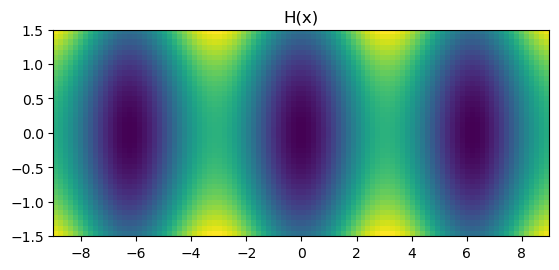

In [16]:
# In this cell we will plot the phase space of our example system 
# to get an overview of the global view of the phase 
# space that we would like to approximate.
#
# For this we will generate a grid of points using meshgrid

# num. of points in the grid, grid dimension is (N_p x N_q)
N_q, N_p = 100, 40
N = N_q * N_p

# set up the grid of size N_q x N_p, q is from set [-2pi, 2pi], p is from set [-1, 1] 
#(q_range, p_range) = np.linspace(-2*np.pi, +2*np.pi, N), np.linspace(-1, 1, N)
(q_range, p_range) = np.linspace(-9, 9, N_q), np.linspace(-1.5, 1.5, N_p)
q_grid, p_grid = np.meshgrid(q_range, p_range)

# prepare the input x = [ x_1, .., x_{N} ] of shape (N,2) 
x = np.column_stack([q_grid.flatten(), p_grid.flatten()])
y = H(x) # of shape (N,)
dx = dH(x) # of shape (N, 2)

# in order to plot the values, we need to have output of H(x) in
# shape (N_p,N_q), which means we get the value H(x)[i,j] for the 
# grid point at (q_grid[i,j], p_grid[i,j])
y_grid = y.reshape((N_p,N_q))
dx_grid = dx.reshape((N_p,N_q,2))

print('q_grid:', q_grid.shape) # (N_p,N_q)
print('p_grid:', p_grid.shape) # (N_p,N_q)
print('y_grid:', y_grid.shape) # (N_p,N_q)
print('dx_grid:', dx_grid.shape) # (N_p, N_q, 2)

# visualize using imshow
fig = plt.figure()
ax = plt.gca()
ax.imshow(y_grid, extent=[-9.0, 9.0, -1.5, 1.5])
ax.set_aspect(2.5)
ax.set_title('H(x)')
#plt.pcolormesh(q_grid, p_grid, y_grid)
#plt.xlabel('q')
#plt.ylabel('p')
#plt.colorbar()
#print()

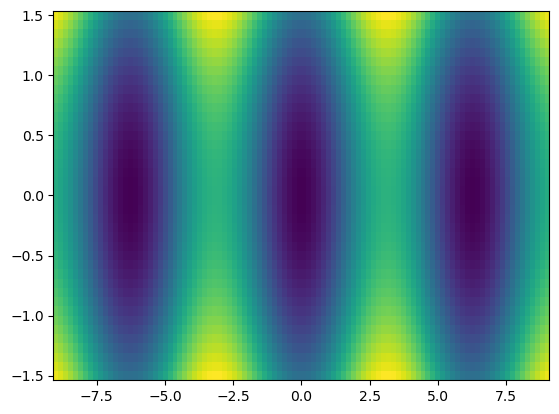

In [7]:
plt.pcolormesh(q_grid, p_grid, y_grid)

ex: [-1.5, 1.5, -9.0, 9.0]
ey: [-9.0, 9.0, -1.5, 1.5]


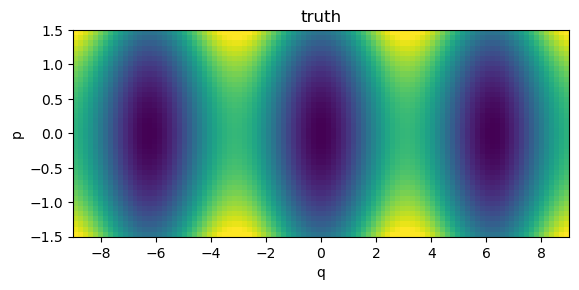

In [9]:
figsize2 = (11*3/4/2,4*3/4)
asp = 2.5

fig, ax = plt.subplots(1,1,sharey=True)
ax=[ax]
ex = [np.min(x[:,1]),np.max(x[:,1]),np.min(x[:,0]), np.max(x[:,0])]
ey = [np.min(x[:,0]),np.max(x[:,0]),np.min(x[:,1]), np.max(x[:,1])]
print('ex:', ex)
print('ey:', ey)
im1 = ax[0].imshow(y_grid, extent=ey,origin='lower',vmin=0,vmax=3);
#.contour(q_range, p_range, y_grid,10,colors='white',extent=ex,linewidths=1);
#ax[0].scatter(x[:,0],x[:,1],s=.5,c='r')
ax[0].set_title('truth')
ax[0].set_aspect(1)
ax[0].set_ylabel('p')
ax[0].set_xlabel('q')
ax[0].set_aspect(asp)

#im_ratio = x.shape[0]/x.shape[1]
#fig.colorbar(im1, fraction=0.049*im_ratio, pad=0.05)


## Approximating H(x)

Now we want to approximate the Hamiltonian using sampled networks. For this we need to set up some equations for the sampled Network.

In [ ]:
# TODO: sampled network sampling

In [ ]:
# visualize H(x), dH/dq and dH/dp 
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)

# H(x)
im0 = ax0.imshow(y_grid, extent=[-9.0, 9.0, -1.5, 1.5])
fig.colorbar(im0, ax=ax0)
ax0.set_ylabel('p')
ax0.set_xlabel('q')
ax0.set_aspect(2.5)
ax0.set_title('H(x)')

im1 = ax1.imshow(dx_grid[:,:,0], extent=[-9.0, 9.0, -1.5, 1.5])
fig.colorbar(im1, ax=ax1)
ax1.set_ylabel('p')
ax1.set_xlabel('q')
ax1.set_aspect(2.5)
ax1.set_title('dH(x)/dq')

im2 = ax2.imshow(dx_grid[:,:,1], extent=[-9.0, 9.0, -1.5, 1.5])
fig.colorbar(im2, ax=ax2)
ax2.set_ylabel('p')
ax2.set_xlabel('q')
ax2.set_aspect(2.5)
ax2.set_title('dH(x)/dp')


/tmp/ipykernel_54642/3980478290.py:18: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


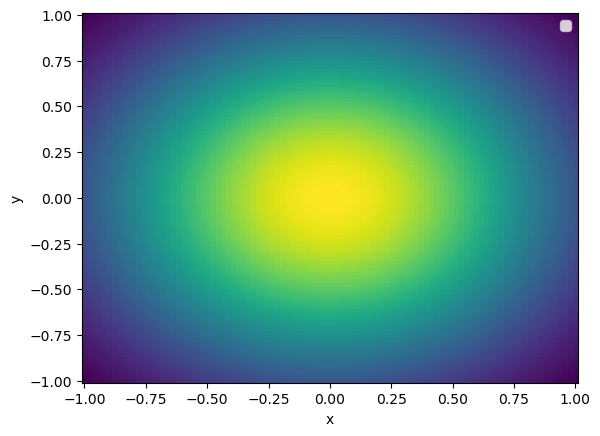

In [10]:
#x = np.linspace(-1, 1, 100)
#y = np.linspace(-1, 1, 100)
#i_x, i_y = np.meshgrid(x, y)
# we will sample a grid of points, where we want to evaluate the Hamiltonian function
# to show the phase space
# number of points to sample per row/column in a grid layout
#N = 100
#x = np.array([q, p]).T
#y = H(x)
#dx = dH(x)

# function validation
#array1 = H(x)
#array2 = PAPER_H(x)
#print("Are H and dH correctly defined? =>", (array1==array2).all())

# In the following we will plot the phase space 
# to get an overview of the global view of the phase 
# space that we would like to approximate.
#
# each random sampled point x in [-2pi,2pi] x [-1,1] represents an initial state (q0,p0) 



#x = np.linspace(-1, 1, N)
#y = f(x)
#dx = df(x)

#train_x = np.linspace(-2*np.pi,2*np.pi,K)+np.random.randn(K,)*noise*1e-3
#train_y = np.linspace(-1,1,K)+np.random.randn(K,)*noise*1e-3


# Define the range for q and p
#q_range = np.linspace(-2 * np.pi, 2 * np.pi, 100)
#p_range = np.linspace(-1, 1, 100)

# Create a grid of q and p values using meshgrid
#q_grid, p_grid = np.meshgrid(q_range, p_range)

# Calculate Hamiltonian values for each point in the grid
#hamiltonian_values = H(np.stack((q_grid, p_grid), axis=-1))

# Create a colored mesh plot to visualize the Hamiltonian values
# TODO create a plot 

#plt.pcolormesh(q_grid, p_grid, hamiltonian_values, shading='auto', cmap='viridis')
#plt.colorbar(label='Hamiltonian Value')
#plt.xlabel('q')
#plt.ylabel('p')
#plt.title('Phase Space Visualization (Hamiltonian Grid)')
#plt.show()

In [ ]:
def image_contour(ax, field, extent,
    label=None, levels=None, cmap='viridis', colors=None, aspect='auto',
    do_imshow=False,
    do_remove_extreme=False,
 
    # Like (batch_qp[:, 0], batch_qp[:, 1]))
    training_data=None,
 
    scatter_kw=dict(color='black', s=24, label='sample training batch'),
 
    **kw_imshow
    ):
    fig = ax.figure
 
    if do_imshow:
        imshow = ax.imshow(field, extent=extent, origin='lower', cmap=cmap, aspect='auto', **kw_imshow)
 
        if colors is None: colors = 'white'
 
    contour = ax.contour(field, extent=extent, levels=levels, colors=colors, linewidths=4)
 
    if do_imshow:
        mappable = imshow
    else:
        mappable = contour
 
    fig.colorbar(
        mappable,
        label=label,
        ax=ax
    )
 
    if training_data is not None:
        ax.scatter(*training_data, **scatter_kw)
         
    if do_remove_extreme:
        kw = do_remove_extreme if isinstance(do_remove_extreme, dict) else {}
        field = remove_extreme(field, **kw)

x:  [[-1.00000000e+00]
 [-8.33333333e-01]
 [-6.66666667e-01]
 [-5.00000000e-01]
 [-3.33333333e-01]
 [-1.66666667e-01]
 [-7.54473002e-12]
 [ 1.66666667e-01]
 [ 3.33333333e-01]
 [ 5.00000000e-01]
 [ 6.66666667e-01]
 [ 8.33333333e-01]
 [ 1.00000000e+00]]
dim of x:  (13, 1)


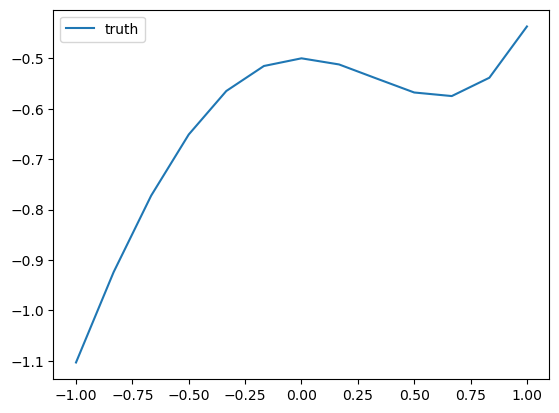

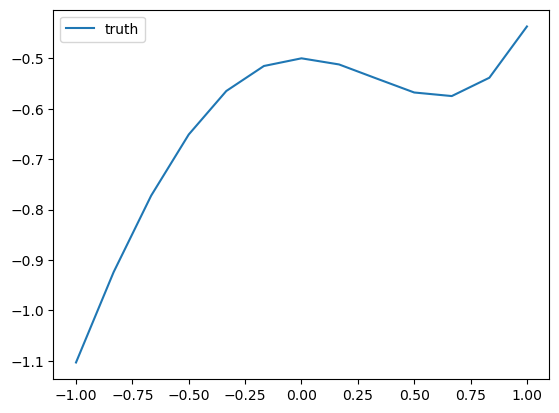

In [5]:
# input data is x 
# goal: appproximate f(x)
#  
# but how we do it?
# - we will first use Gaussian process to estimate f(x) 
# - then we will use a linear  NN to estimate f(x) by solving least squares
# - then we will build a shallow NN to learn the params using GD to approximate f(x) 
# - then we will use sampling NN to estimate with sampled weights and least squares to approximate f(x) 
#

# try solving d/dx f(x) = g(x)
def f(x):
    return x**3/3-x**2/2-1/2*np.cos(x**2)
def g(x):
    return x**2-x+np.sin(x**2)*x



# fix the random here
#np.random.seed(123495)

noise = 1e-8
N_forTrue = 100

N = 15
K = 13


x = np.linspace(-1,1,K).reshape(K,1)+np.random.randn(K,1)*noise*1e-3
y = np.linspace(-1,1,N).reshape(N,1)+np.random.randn(N,1)*noise*1e-3

print('x: ', x)
print('dim of x: ', np.shape(x))

# true function
fig = plt.figure()
plt.plot(x ,solution1(x),label='truth');
plt.legend()
fig = plt.figure()
plt.plot(x_forTrue ,solution1(x_forTrue),label='truth');
plt.legend()


#gy = g1(y)
#theta = 0.3
#x0 = np.array([0,-.5,.9]).reshape(-1,1)
#f0 = solution1(x0)

#print('theta=',theta)n
#print('x0,f0 = ', x0, f0)
#print('x0,f0 = ', x0.shape, f0.shape)
#print('xx,yy', x.shape, y.shape)

#gp = GaussianProcess(x,None,theta=theta,output_noise_std=noise)
#fx = gp.solve(x0,f0,y,gy,solver_tolerance=1e-8)

#fig = plt.figure()m
#plt.plot(x,(fx),'ro',markevery=1,label='approximation');
#plt.plot(x,solution1(x),label='truth');
#plt.legend()

In [ ]:
# chatgpt imports
import numpy as np
import scipy
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import Ridge  # Import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Generate sample data (sine wave)
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to approximate (e.g., a sine wave)
def target_function(x):
    return np.sin(x)

# Create a range for predictions
x_range = np.linspace(-2, 2, 100).reshape(-1, 1)

# ELM Model
elm_model = Ridge(alpha=1e-6)
elm_model.fit(X_train, y_train)
y_pred_elm = elm_model.predict(x_range)  # Predict for the entire x_range

# Normal Shallow Network (MLP)
mlp_model = MLPRegressor(hidden_layer_sizes=(10,), activation='tanh', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(x_range)  # Predict for the entire x_range

# Log-likelihood minimization to find optimal hyperparameters for Gaussian Process
noise = 0.1
best_theta, thetas, lls = GP.GaussianProcess.llmin(X_train, y_train, noise, NT=20)

# Create a Gaussian Process model with the best hyperparameters
gpr = GP.GaussianProcess(X_train, y_train, best_theta, kernel=GP.GaussianProcess.gaussian_kernel)

# Calculate Gaussian Process predictions for the entire x_range
y_mean, y_std = gpr.predict(x_range)

# Ensure that y_mean and y_std have the same shape as x_range
if y_mean.shape != x_range.shape:
    raise ValueError("Shapes of y_mean and x_range are not compatible")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Data', marker='o')
plt.plot(x_range, target_function(x_range), label='True Function', linestyle='--')
plt.plot(x_range, y_pred_elm, label='ELM', linestyle='-')
plt.plot(x_range, y_pred_mlp, label='MLP', linestyle='-')
plt.plot(X_train, y_train, 'ro', label='Training Data')
plt.plot(x_range, y_mean, label='Gaussian Process Mean', linestyle='-')
plt.fill_between(x_range.flatten(), (y_mean - y_std).flatten(), (y_mean + y_std).flatten(), color='lightcoral', alpha=0.5, label='Gaussian Process Uncertainty')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Function Approximation with ELM, MLP, and Gaussian Process')
plt.show()

/home/gergedan/.local/miniconda3/envs/thesis/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: Shapes of y_mean and x_range are not compatible




# Performance of Sampled Neural Networks in Hamiltonian Estimation



$$
  w_{t+1} = (1 + r_{t+1}) s(w_t) + y_{t+1}
$$ 



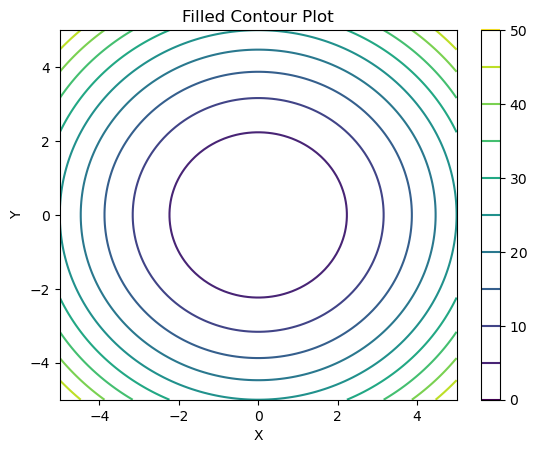

In [17]:
# Create data for X, Y, and Z (typically from meshgrid and function evaluation)
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = X**2 + Y**2

# Create a filled contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar()  # Add a colorbar
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Filled Contour Plot')
plt.show()

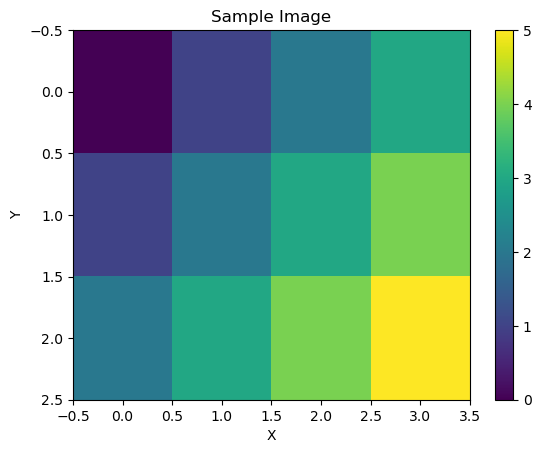

In [18]:
# Create a simple 2D image (array)
image_data = np.array([[0, 1, 2, 3],
                      [1, 2, 3, 4],
                      [2, 3, 4, 5]])

# Display the image using imshow
plt.imshow(image_data, cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar()  # Add a colorbar
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample Image')
plt.show()